<a href="https://colab.research.google.com/github/stevengregori92/Lung-Cancer-Image-Detection/blob/main/Lung_Cancer_Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Packages & Libraries

In [ ]:
!gdown https://drive.google.com/uc?id=1rhbFFgPQdtbdGiIUNdoT9K0eDj5ctcJ5 &> /dev/null

In [ ]:
from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [ ]:
!kaggle datasets download -d hamdallak/the-iqothnccd-lung-cancer-dataset &> /dev/null
!unzip /content/the-iqothnccd-lung-cancer-dataset.zip &> /dev/null
!rm -r /content/the-iqothnccd-lung-cancer-dataset.zip &> /dev/null

!kaggle datasets download -d diayruldip/carinocroma &> /dev/null
!unzip /content/carinocroma.zip &> /dev/null
!rm -r /content/carinocroma.zip &> /dev/null

In [ ]:
import imghdr
import os, cv2, shutil, math, random as rd, numpy as np, matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Rescaling

#Dataset Management

In [ ]:
# !rm -r '/content/The IQ-OTHNCCD lung cancer dataset'
# !rm -r Dataset
# !rm -r Data
# !rm -r Test

In [ ]:
main_dir = '/content/Test'
sub_dirs = ['Normal', 'Cancer']

for dir in sub_dirs:
  os.makedirs(os.path.join(main_dir, dir), exist_ok=True)

In [ ]:
# # Specify the source and destination directories
src_dir = '/content/The IQ-OTHNCCD lung cancer dataset/Malignant cases'
dst_dir = '/content/Test/Cancer'

# Get a list of all files in the source directory
files = os.listdir(src_dir)

# Sort the files
files.sort()

# Move the first 5 files
for file in files[:5]:
    shutil.move(os.path.join(src_dir, file), dst_dir)

# Specify the source and destination directories
src_dir = '/content/The IQ-OTHNCCD lung cancer dataset/Normal cases'
dst_dir = '/content/Test/Normal'

# Get a list of all files in the source directory
files = os.listdir(src_dir)

# Sort the files
files.sort()

# Move the first 5 files
for file in files[:5]:
    shutil.move(os.path.join(src_dir, file), dst_dir)

In [ ]:
main_dir = '/content/Dataset'
sub_dirs = ['Normal', 'Cancer']

for dir in sub_dirs:
  os.makedirs(os.path.join(main_dir, dir), exist_ok=True)

In [ ]:
def list_dir(path):
    return [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]

def list_files(path):
    return [name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]

In [ ]:
source_directory = '/content/Data/train/normal'
destination_directory = '/content/Dataset/Normal'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

source_directory = '/content/Data/test/normal'
destination_directory = '/content/Dataset/Normal'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

source_directory = '/content/Data/valid/normal'
destination_directory = '/content/Dataset/Normal'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

source_directory = '/content/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
destination_directory = '/content/Dataset/Cancer'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

source_directory = '/content/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
destination_directory = '/content/Dataset/Cancer'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

source_directory = '/content/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
destination_directory = '/content/Dataset/Cancer'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

source_directory = '/content/Data/test/adenocarcinoma'
destination_directory = '/content/Dataset/Cancer'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

source_directory = '/content/Data/test/large.cell.carcinoma'
destination_directory = '/content/Dataset/Cancer'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

source_directory = '/content/Data/test/squamous.cell.carcinoma'
destination_directory = '/content/Dataset/Cancer'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

source_directory = '/content/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
destination_directory = '/content/Dataset/Cancer'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

source_directory = '/content/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
destination_directory = '/content/Dataset/Cancer'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

source_directory = '/content/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
destination_directory = '/content/Dataset/Cancer'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

!rm -r /content/Data

In [ ]:
# source_directory = '/content/The IQ-OTHNCCD lung cancer dataset/Bengin cases'
# destination_directory = '/content/Dataset/Cancer'

# for file in os.listdir(source_directory):
#     # create full file paths
#     source = os.path.join(source_directory, file)
#     destination = os.path.join(destination_directory, file)

#     # move the file
#     shutil.move(source, destination)

source_directory = '/content/The IQ-OTHNCCD lung cancer dataset/Malignant cases'
destination_directory = '/content/Dataset/Cancer'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

source_directory = '/content/The IQ-OTHNCCD lung cancer dataset/Normal cases'
destination_directory = '/content/Dataset/Normal'

for file in os.listdir(source_directory):
    # create full file paths
    source = os.path.join(source_directory, file)
    destination = os.path.join(destination_directory, file)

    # move the file
    shutil.move(source, destination)

!rm -r '/content/The IQ-OTHNCCD lung cancer dataset'

#Dataset & Dataloader

In [ ]:
batch_size = 32
img_height = 100
img_width = 100

data_dir = '/content/Dataset'

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Resizing(img_height, img_width),  # Resize with a slight increase in size
    tf.keras.layers.Rescaling(1./255),  # Rescale pixel values to [0,1]
    # tf.keras.layers.RandomRotation(0.05),
    # tf.keras.layers.RandomZoom(0.05),
    # tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomContrast(0.2),
    # tf.keras.layers.RandomFlip("horizontal_and_vertical"),
])

# Load and preprocess training data with data augmentation
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Load validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 1771 files belonging to 2 classes.
Using 1417 files for training.
Found 1771 files belonging to 2 classes.
Using 354 files for validation.
['Cancer', 'Normal']


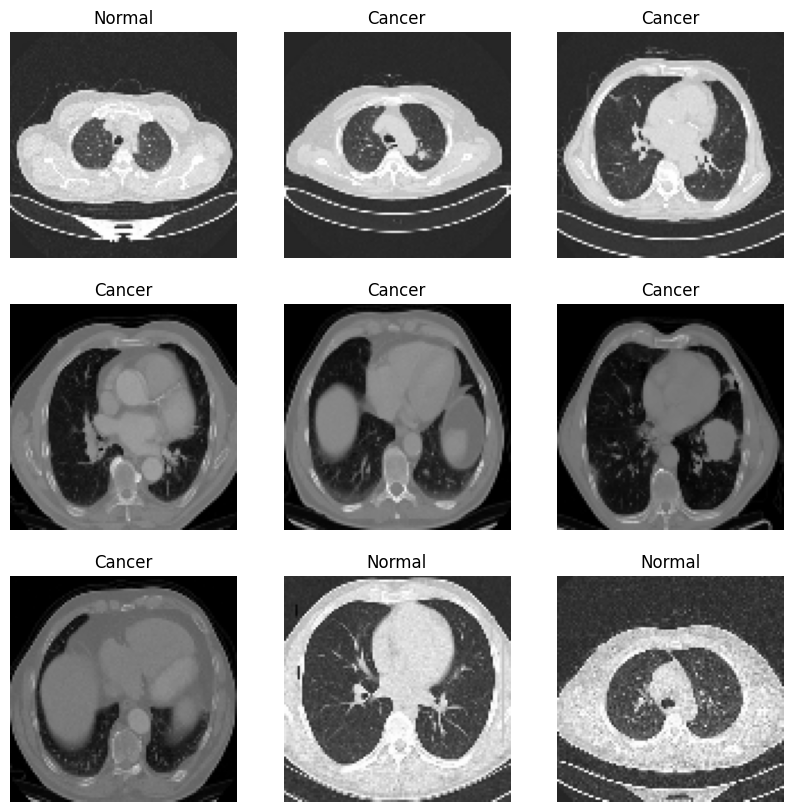

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Apply data augmentation to training dataset
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

#Architechture & Config

In [ ]:
num_classes = len(class_names)

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 128)      

#Train

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  # callbacks=[early_stop]
)

Epoch 1/20
45/45 [==============================] - 11s 94ms/step - loss: 0.7219 - accuracy: 0.6803 - val_loss: 20.5562 - val_accuracy: 0.7994
Epoch 2/20
45/45 [==============================] - 6s 130ms/step - loss: 0.4326 - accuracy: 0.8031 - val_loss: 32.8101 - val_accuracy: 0.7740
Epoch 3/20
45/45 [==============================] - 5s 87ms/step - loss: 0.2920 - accuracy: 0.8779 - val_loss: 40.0775 - val_accuracy: 0.7684
Epoch 4/20
45/45 [==============================] - 4s 87ms/step - loss: 0.1379 - accuracy: 0.9555 - val_loss: 67.4394 - val_accuracy: 0.7203
Epoch 5/20
45/45 [==============================] - 6s 127ms/step - loss: 0.0848 - accuracy: 0.9704 - val_loss: 13.6799 - val_accuracy: 0.9407
Epoch 6/20
45/45 [==============================] - 4s 85ms/step - loss: 0.0425 - accuracy: 0.9852 - val_loss: 24.4566 - val_accuracy: 0.9124
Epoch 7/20
45/45 [==============================] - 6s 111ms/step - loss: 0.0339 - accuracy: 0.9887 - val_loss: 48.4726 - val_accuracy: 0.8333
Ep

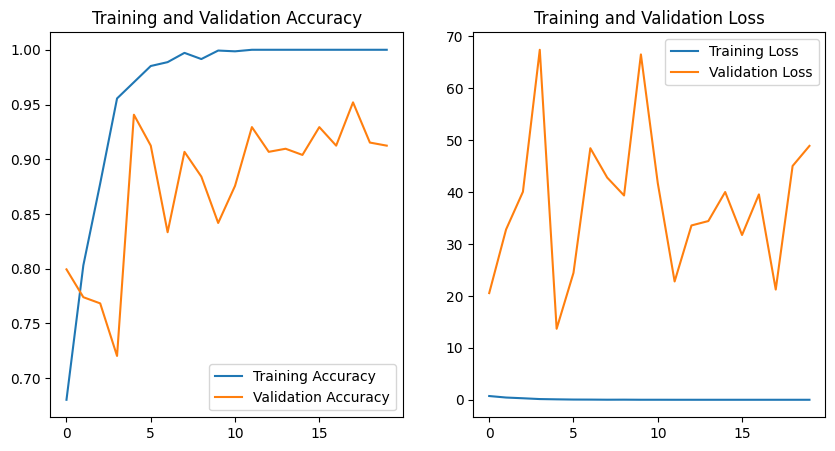

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Test

1/1 [==============================] - 0s 64ms/step
This image most likely belongs to Cancer with a 100.00 percent confidence.


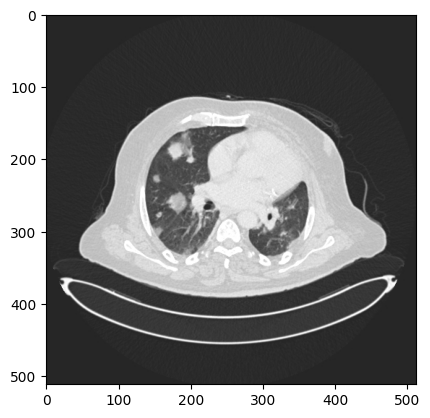

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

path = "/content/Test/Cancer/Malignant case (100).jpg"

im = Image.open(path)
plt.figure()
plt.imshow(im)

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)